In [16]:
import os
from tqdm.auto import tqdm
import numpy as np
import matplotlib.pyplot as plt

from build.autoneuronet import (
    Var,
    Matrix,
    Linear,
    NeuralNetwork,
    GradientDescentOptimizer,
    MSELoss,
)

# Linear Regression


In [2]:
# Linear Regression
n_samples = 10

X = Matrix(n_samples, 1)  # shape: (n_samples, 1)
y = Matrix(n_samples, 1)  # shape: (n_samples, 1)

for i in range(n_samples):
    X[i, 0] = Var(i)
    y[i, 0] = 5.0 * i + 3.0

In [10]:
lr = 1e-2
epochs = 1000

lr_model = NeuralNetwork([Linear(1, 1)])
optimizer = GradientDescentOptimizer(learning_rate=lr, model=lr_model)

lr_model

NeuralNetwork =
Linear(1, 1)

In [4]:
# Training Loop

for epoch in tqdm(range(epochs), desc="Training linear regression model"):
    optimizer.resetGrad()

    # Forward pass
    y_pred = lr_model.forward(X)

    # Calculate the loss
    loss = MSELoss(y, y_pred)
    loss_val = loss.getVal()

    # Backpropagation
    loss.setGrad(1.0)
    loss.backward()
    optimizer.optimize()

    if epoch % 100 == 0:
        print(f"Epoch: {epoch + 1} | Train Loss: {loss_val}")

Training linear regression model: 100%|██████████| 1000/1000 [00:00<00:00, 88588.35it/s]

Epoch: 1 | Train Loss: 1591.0445458274394
Epoch: 101 | Train Loss: 0.31521368439121855
Epoch: 201 | Train Loss: 0.1015544114890824
Epoch: 301 | Train Loss: 0.032718435155542916
Epoch: 401 | Train Loss: 0.010541107799561874
Epoch: 501 | Train Loss: 0.0033960962104009618
Epoch: 601 | Train Loss: 0.0010941420664323709
Epoch: 701 | Train Loss: 0.0003525067569847745
Epoch: 801 | Train Loss: 0.00011356935953037078
Epoch: 901 | Train Loss: 3.658936791584936e-05


In [19]:
# Make Predictions
y_pred = lr_model.forward(X)

print(f"Ground Truth Labels:\n{y}\n")
print(f"Final Linear Regression Model Predictions:\n{y_pred}")

first_layer = lr_model.layers[0]
W_learned, b_learned = first_layer.W, first_layer.b

print(f"Learned W(0, 0) = {W_learned[0, 0]}")
print(f"Learned b(0, 0) = {b_learned[0, 0]}")

Ground Truth Labels:
Matrix(10 x 1) = 
3.000000 
8.000000 
13.000000 
18.000000 
23.000000 
28.000000 
33.000000 
38.000000 
43.000000 
48.000000 


Final Linear Regression Model Predictions:
Matrix(10 x 1) = 
2.993619 
7.994637 
12.995654 
17.996672 
22.997690 
27.998707 
32.999725 
38.000742 
43.001760 
48.002777 

Learned W(0, 0) = Var(val=5.001018, grad=0.000000)
Learned b(0, 0) = Var(val=2.993619, grad=0.000000)


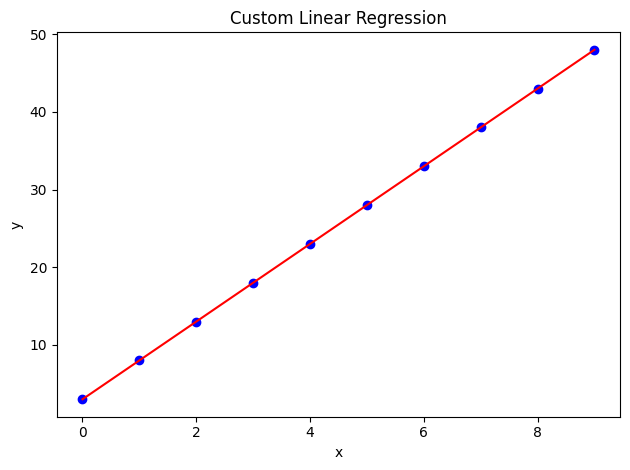

In [20]:
x_np = np.array([X[i, 0].getVal() for i in range(X.rows)])
y_np = np.array([y[i, 0].getVal() for i in range(y.rows)])
y_pred_np = np.array([y_pred[i, 0].getVal() for i in range(y_pred.rows)])

plt.scatter(x_np, y_np, color="blue")
plt.plot(x_np, y_pred_np, color="red")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Custom Linear Regression")

plt.tight_layout()
plt.show()

In [ ]:
os.makedirs("models", exist_ok=True)
lr_model.saveWeights("models/lr_model.bin")

In [17]:
lr_model.loadWeights("models/lr_model.bin")